# Linear Regression implemenation

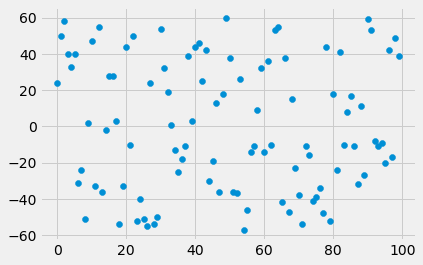

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')


def create_dataset(hm, variance, step = 2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if(correlation and correlation == 'pos'):
            val += step
        elif (correlation and correlation == 'neg'):
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

#xs = [1, 2, 3, 4, 5, 6]
#ys = [5, 4, 6, 5, 6, 7]

xs, ys = create_dataset(100, 60, 2)

plt.scatter(xs, ys)
plt.show()

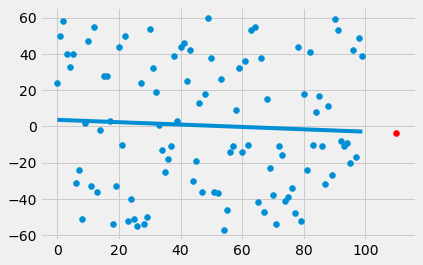

In [2]:
# creating numpy array

xs = np.array(xs, dtype=np.float64)
ys = np.array(ys, dtype=np.float64)

def best_fit_slop_and_intercept(xs, ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) /
            ((mean(xs)**2) - mean(xs**2))
        )
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slop_and_intercept(xs, ys)

regression_line = [(m*x) + b for x in xs]

predict_x = 110
predict_y = (m*predict_x) + b


plt.scatter(xs, ys)

plt.scatter(predict_x, predict_y, color='red')

plt.plot(xs, regression_line)
plt.show()

In [3]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    squared_error_regression = squared_error(ys_orig, ys_line);
    squared_error_mean = squared_error(ys_orig, mean(ys_orig));
    return 1 - (squared_error_regression/squared_error_mean)

r_squared = coefficient_of_determination(ys, regression_line)

print('r_squared = '+str(r_squared))

r_squared = 0.00279123521285
